In [1]:
import json
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset

In [2]:
label_path = 'bdd100k/labels/bdd100k_labels_images_val.json'
image_val_path = 'bdd100k/images/100k/val/'

In [3]:
json_file = open(label_path, 'r')
labels_json = json.load(json_file)

In [4]:
data_example = labels_json[0]

# Overview

In [5]:
len(labels_json)

10000

In [6]:
data_example.keys()

dict_keys(['name', 'timestamp', 'labels', 'attributes'])

In [7]:
len(data_example['labels'])

51

In [8]:
data_example['labels'][0]

{'attributes': {'occluded': False,
  'trafficLightColor': 'none',
  'truncated': False},
 'box2d': {'x1': 1000.698742,
  'x2': 1040.626872,
  'y1': 281.992415,
  'y2': 326.91156},
 'category': 'traffic sign',
 'id': 0,
 'manualAttributes': True,
 'manualShape': True}

# Draw box

In [9]:
img_path = image_val_path + data_example['name']
img = mpimg.imread(img_path)
img_path

'bdd100k/images/100k/val/b1c66a42-6f7d68ca.jpg'

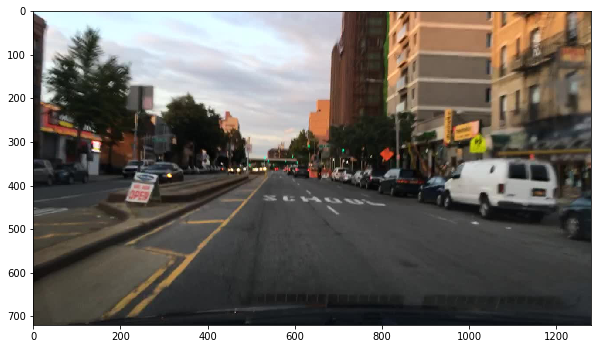

In [10]:
fig = plt.figure(figsize=(10,10))
plt.plot()
plt.imshow(img)

In [11]:
def random_color():
    return np.random.rand(3)

In [12]:
label_colors = {}
def get_label_color(label_id):
    if label_id not in label_colors:
        label_colors[label_id] = random_color()
    return label_colors[label_id]

In [13]:
def box2rect(label_id, box2d):
    """generate individual bounding box from label"""
    x1 = box2d['x1']
    y1 = box2d['y1']
    x2 = box2d['x2']
    y2 = box2d['y2']

    box_color = get_label_color(label_id)

    # Draw and add one box to the figure
    return mpatches.Rectangle(
        (x1, y1), x2 - x1, y2 - y1,
        linewidth=3 * 1, edgecolor=box_color, facecolor='none',
        fill=False, alpha=0.75
    )

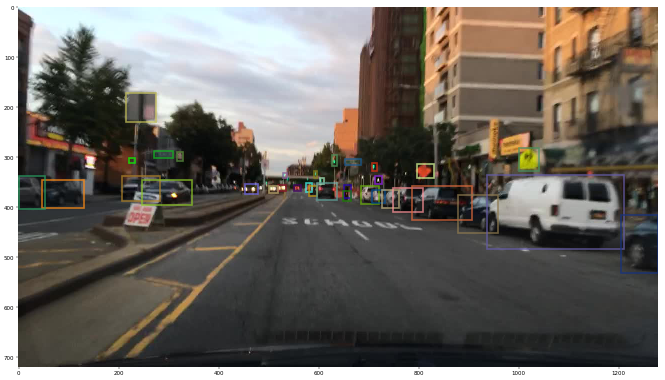

In [14]:
fig = plt.figure(figsize=(16, 9), dpi=40)
ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False)
ax.imshow(img)

for o in data_example['labels']:
    if 'box2d' in o:
        ax.add_patch(box2rect(o['id'], o['box2d']))